In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df_link = "./data/AAPL.csv"
df = pd.read_csv(df_link, index_col='Date', parse_dates=True)

In [22]:
data = df[['Close']]
data.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
data   = scaler.fit_transform(data)
data

array([[4.00083990e-04],
       [3.66276240e-04],
       [3.21194149e-04],
       ...,
       [9.37039559e-01],
       [9.30021518e-01],
       [9.18206989e-01]])

In [24]:
test_len  = 60
pre_day=30
train_len = data.shape[0] - test_len
timesteps = 1
features  = 1

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(data[i-timesteps:i, :])
for i in range(timesteps+pre_day, train_len+pre_day):
  y_train.append(data[i, :])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape, y_train.shape)

(10795, 1, 1) (10795, 1)


In [25]:
model = Sequential()

model.add(LSTM(60, return_sequences=True, input_shape=(timesteps, features)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [26]:
return_sequences=True

In [27]:
model.fit(X_train, y_train, batch_size=10, epochs=2)

Epoch 1/2
1080/1080 [==============================] - 18s 8ms/step - loss: 0.0026
Epoch 2/2
1080/1080 [==============================] - 8s 8ms/step - loss: 5.9135e-04


# thử nghiệm mô hình dự đoán 30 ngày

In [28]:
X_test = []
y_test = []

for i in range(train_len, data.shape[0]-pre_day):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+pre_day, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_test)


[[[0.90346406]]

 [[0.90043465]]

 [[0.9075537 ]]

 [[0.91214826]]

 [[0.90275721]]

 [[0.90210082]]

 [[0.89417393]]

 [[0.88755981]]

 [[0.88564126]]

 [[0.87261496]]

 [[0.87322081]]

 [[0.87544236]]

 [[0.86362783]]

 [[0.8423717 ]]

 [[0.84908682]]

 [[0.85953811]]

 [[0.86196166]]

 [[0.8781183 ]]

 [[0.89629455]]

 [[0.89164945]]

 [[0.90467576]]

 [[0.9177526 ]]

 [[0.92315494]]

 [[0.92073146]]

 [[0.94087673]]

 [[0.93279846]]

 [[0.94612769]]

 [[0.94900555]]

 [[0.95758883]]

 [[0.95748783]]]


In [29]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 3s 3s/step


In [30]:
y_pred

array([[175.73859],
       [175.20444],
       [176.45885],
       [177.26703],
       [175.61397],
       [175.49826],
       [174.0991 ],
       [172.92915],
       [172.58934],
       [170.27713],
       [170.38486],
       [170.77975],
       [168.67677],
       [164.87491],
       [166.07849],
       [167.9471 ],
       [168.3796 ],
       [171.25507],
       [174.47371],
       [173.65282],
       [175.95209],
       [178.25131],
       [179.19858],
       [178.77382],
       [182.2952 ],
       [180.88568],
       [183.20953],
       [183.71007],
       [185.20027],
       [185.18272]], dtype=float32)

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-24.529228358860284


In [32]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
rmse

19.07795811305525

In [33]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")

MAPE: 9.001939674304719%


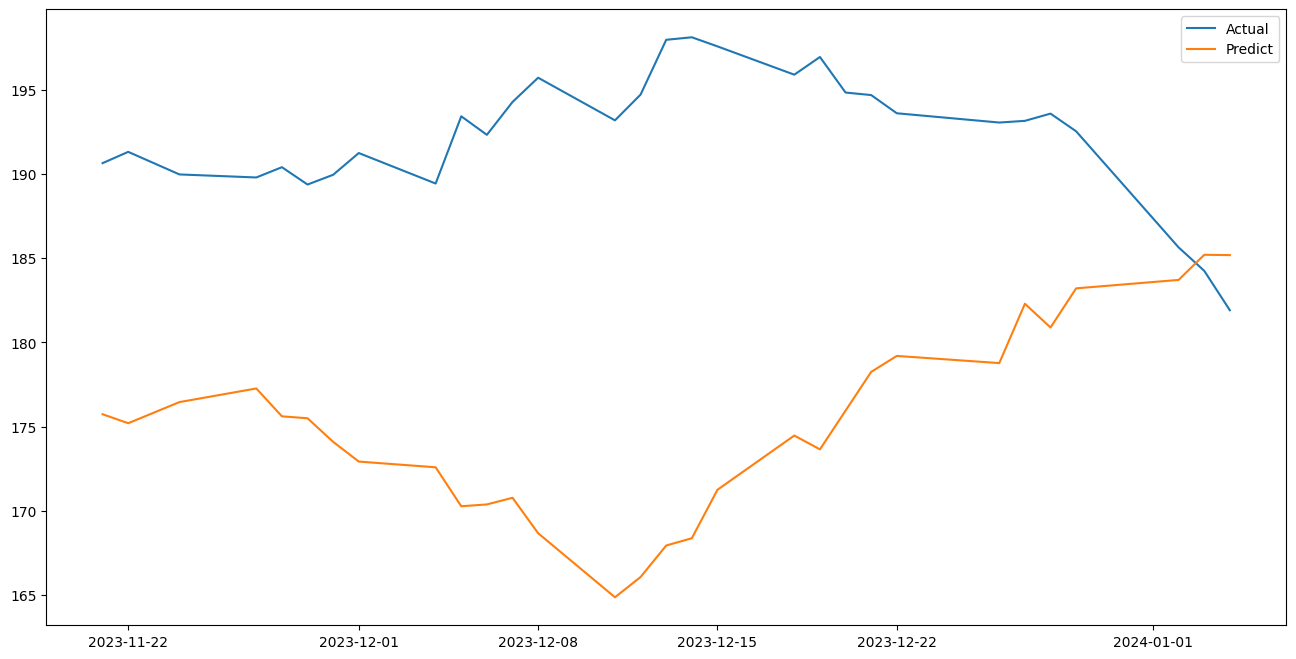

In [34]:
actual = df[['Close']].iloc[train_len+pre_day:, :]
pred   = df[['Close']].iloc[train_len+pre_day:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

# thử nghiệm mô hình dự đoán trên 7 ngày

In [35]:
X_test = []
y_test = []
train_len = data.shape[0]-14
for i in range(train_len, data.shape[0]-7):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+7, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 0s 77ms/step


In [36]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print(rmse)
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")
r2 = r2_score(y_test,y_pred)
print(r2)

4.288739073685552
MAPE: 1.824579798225804%
0.1473675094505832


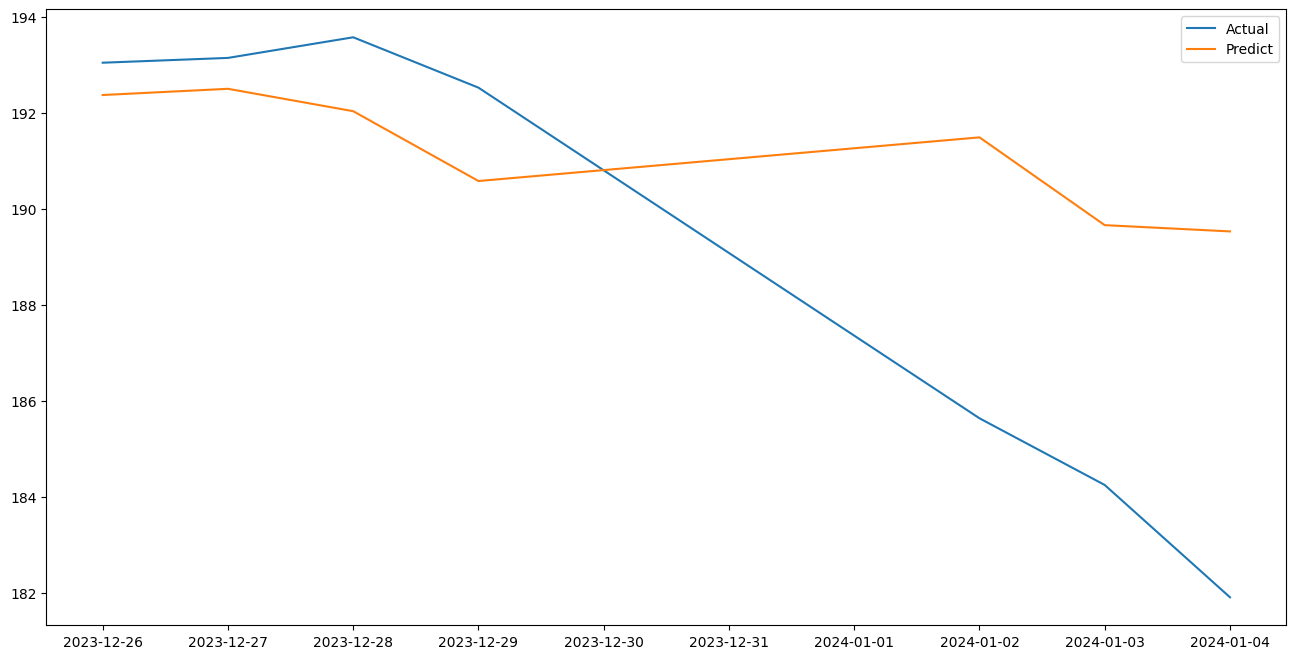

In [37]:
actual = df[['Close']].iloc[train_len+7:, :]
pred   = df[['Close']].iloc[train_len+7:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()

# Thử nghiệm dự đoán trên 15 ngày

In [38]:
X_test = []
y_test = []
train_len = data.shape[0]-30
for i in range(train_len, data.shape[0]-15):
  X_test.append(data[i-timesteps:i, :])
for i in range(train_len+15, data.shape[0]):
  y_test.append(data[i, :])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 0s 115ms/step


In [39]:
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print(rmse)
mape_value = calculate_mape(y_test, y_pred)
print(f"MAPE: {mape_value}%")
r2 = r2_score(y_test,y_pred)
print(r2)

8.698218611950852
MAPE: 4.274366879428225%
-2.1861452900910385


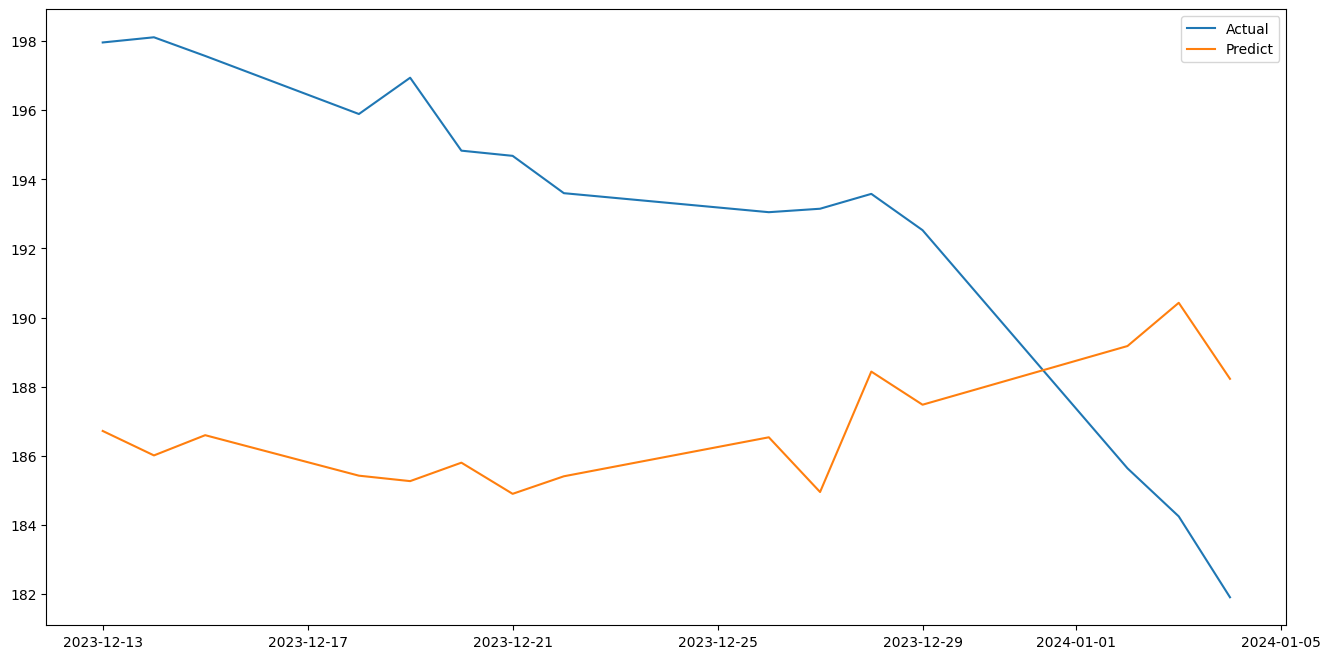

In [40]:
actual = df[['Close']].iloc[train_len+15:, :]
pred   = df[['Close']].iloc[train_len+15:, :]
pred[['Predict']] = y_pred
plt.figure(figsize=(16, 8))
plt.plot(actual, label='Actual')
plt.plot(pred[['Predict']], label='Predict')
plt.legend()
plt.show()